In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy import cluster
%matplotlib inline

In [39]:
#读取文件
df = pd.read_csv('species_annotation.txt',sep='\t',index_col=0)
df

,top_taxonomy_name,distance,pvalue,matching,full_taxonomy,taxonomic_subspecies,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,...,taxonomic_parvorder,taxonomic_varietas,taxonomic_infraorder,taxonomic_species subgroup,taxonomic_superorder,taxonomic_superfamily,taxonomic_species group,taxonomic_subtribe,taxonomic_subgenus,taxonomic_subfamily
sample,,,,,,,,,,,,,,,,,,,,,
bin_concoct.111,Alloscardovia omnicolens F0580,0.013482,0.000000e+00,270/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Alloscardovia omnicolens DSM 21503,0.013900,0.000000e+00,267/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Nomascus leucogenys,0.220090,5.272220e-07,6/400,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,...,Catarrhini,NaN,Simiiformes,NaN,Euarchontoglires,Hominoidea,NaN,NaN,NaN,NaN
bin_concoct.111,Gardnerella vaginalis 1500E,0.220090,1.109830e-09,6/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Vibrio vulnificus MO6-24/O,0.220090,4.699090e-08,6/400,Bacteria; Proteobacteria; Gammaproteobacteria;...,NaN,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bin_metabat.71,Porphyromonas catoniae ATCC 51270,0.035823,0.000000e+00,157/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_metabat.71,Porphyromonas catoniae F0037,0.039432,0.000000e+00,145/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_metabat.71,Hyphomonas chukchiensis,0.245123,4.330890e-06,4/400,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#df以top_taxonomy_name列为索引
df = df.set_index('top_taxonomy_name')
df

,distance,pvalue,matching,full_taxonomy,taxonomic_subspecies,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,...,taxonomic_parvorder,taxonomic_varietas,taxonomic_infraorder,taxonomic_species subgroup,taxonomic_superorder,taxonomic_superfamily,taxonomic_species group,taxonomic_subtribe,taxonomic_subgenus,taxonomic_subfamily
top_taxonomy_name,,,,,,,,,,,,,,,,,,,,,
Alloscardovia omnicolens F0580,0.013482,0.000000e+00,270/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloscardovia omnicolens DSM 21503,0.013900,0.000000e+00,267/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nomascus leucogenys,0.220090,5.272220e-07,6/400,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,Mammalia,...,Catarrhini,NaN,Simiiformes,NaN,Euarchontoglires,Hominoidea,NaN,NaN,NaN,NaN
Gardnerella vaginalis 1500E,0.220090,1.109830e-09,6/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vibrio vulnificus MO6-24/O,0.220090,4.699090e-08,6/400,Bacteria; Proteobacteria; Gammaproteobacteria;...,NaN,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,Gammaproteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porphyromonas catoniae ATCC 51270,0.035823,0.000000e+00,157/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Porphyromonas catoniae F0037,0.039432,0.000000e+00,145/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyphomonas chukchiensis,0.245123,4.330890e-06,4/400,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,Alphaproteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#列出df的列名
df.columns

Index(['distance', 'pvalue', 'matching', 'full_taxonomy',
       'taxonomic_subspecies', 'taxonomic_species', 'taxonomic_genus',
       'taxonomic_family', 'taxonomic_order', 'taxonomic_class',
       'taxonomic_phylum', 'taxonomic_kingdom', 'taxonomic_superkingdom',
       'subspecies', 'serovar', 'plasmid', 'bioproject', 'biosample', 'taxid',
       'assembly_accession', 'match_id', 'taxonomic_subphylum',
       'taxonomic_subclass', 'taxonomic_tribe', 'taxonomic_subkingdom',
       'taxonomic_suborder', 'taxonomic_parvorder', 'taxonomic_varietas',
       'taxonomic_infraorder', 'taxonomic_species subgroup',
       'taxonomic_superorder', 'taxonomic_superfamily',
       'taxonomic_species group', 'taxonomic_subtribe', 'taxonomic_subgenus',
       'taxonomic_subfamily'],
      dtype='object')

In [42]:
#提取df的'taxonomic_species', 'taxonomic_genus','taxonomic_family', 'taxonomic_order', 'taxonomic_class','taxonomic_phylum'列
df1 = df[['taxonomic_species', 'taxonomic_genus','taxonomic_family', 'taxonomic_order', 'taxonomic_class','taxonomic_phylum']]
df1

,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
top_taxonomy_name,,,,,,
Alloscardovia omnicolens F0580,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Alloscardovia omnicolens DSM 21503,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Nomascus leucogenys,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,Mammalia,Chordata
Gardnerella vaginalis 1500E,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Vibrio vulnificus MO6-24/O,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,Gammaproteobacteria,Proteobacteria
...,...,...,...,...,...,...
Porphyromonas catoniae ATCC 51270,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
Porphyromonas catoniae F0037,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
Hyphomonas chukchiensis,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,Alphaproteobacteria,Proteobacteria


In [43]:
data = pd.read_csv('newples2.txt',sep='\t',index_col=0)
data

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,4.042226,32.677411,0.000000,0.000000,0.000501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.638463,0.030334,0.051990,0.038786,1.344056,0.086259,0.000000,0.111361,0.016038,0.026896,0.000000,0.000000,0.000000,0.032828
Actinomyces dentalis DSM 19115,0.003712,0.000000,0.000000,0.232150,0.004907,0.058063,0.030914,0.942614,0.000000,0.000000,0.018150,0.723313,0.000000,7.276823
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221492
Capnocytophaga ochracea F0287,0.075325,0.329979,0.000000,0.140356,0.015108,0.167883,0.000000,0.199193,0.000000,0.201194,0.000000,0.000000,0.000000,0.177756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arcobacter butzleri ED-1,0.193216,0.080083,1.939759,0.424290,0.216507,0.025222,0.029105,0.422254,0.012426,0.280935,0.000000,0.000000,0.058328,0.333574
Gemella morbillorum M424,0.305752,0.196224,0.000000,0.031668,0.298741,0.562199,0.612423,1.568907,0.133896,0.366383,0.307443,0.177337,1.654459,0.735955
Streptococcus australis ATCC 700641,1.282748,0.098981,0.136933,0.072197,0.000000,0.000000,36.778263,1.028270,0.000000,0.000000,1.969677,0.274663,0.571681,8.231987


In [44]:
#data删除最后一行
dataa = data.drop(data.index[-1])
dataa

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,4.042226,32.677411,0.000000,0.000000,0.000501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.638463,0.030334,0.051990,0.038786,1.344056,0.086259,0.000000,0.111361,0.016038,0.026896,0.000000,0.000000,0.000000,0.032828
Actinomyces dentalis DSM 19115,0.003712,0.000000,0.000000,0.232150,0.004907,0.058063,0.030914,0.942614,0.000000,0.000000,0.018150,0.723313,0.000000,7.276823
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221492
Capnocytophaga ochracea F0287,0.075325,0.329979,0.000000,0.140356,0.015108,0.167883,0.000000,0.199193,0.000000,0.201194,0.000000,0.000000,0.000000,0.177756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,4.077179,2.073833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arcobacter butzleri ED-1,0.193216,0.080083,1.939759,0.424290,0.216507,0.025222,0.029105,0.422254,0.012426,0.280935,0.000000,0.000000,0.058328,0.333574
Gemella morbillorum M424,0.305752,0.196224,0.000000,0.031668,0.298741,0.562199,0.612423,1.568907,0.133896,0.366383,0.307443,0.177337,1.654459,0.735955


In [45]:
# 计算每个样本的总丰度  
total_abundance = dataa.sum(axis=0)  

# 计算相对丰度  
data1 = dataa.div(total_abundance, axis=1)
data1

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,0.026776,0.281768,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.004229,0.000262,0.000567,0.000892,0.006718,0.001597,0.000000,0.000583,0.000108,0.000376,0.000000,0.000000,0.000000,0.000296
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020018
Capnocytophaga ochracea F0287,0.000499,0.002845,0.000000,0.003228,0.000076,0.003108,0.000000,0.001043,0.000000,0.002816,0.000000,0.000000,0.000000,0.001602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arcobacter butzleri ED-1,0.001280,0.000691,0.021145,0.009758,0.001082,0.000467,0.000181,0.002212,0.000084,0.003932,0.000000,0.000000,0.000234,0.003006
Gemella morbillorum M424,0.002025,0.001692,0.000000,0.000728,0.001493,0.010409,0.003807,0.008218,0.000905,0.005128,0.000500,0.002870,0.006642,0.006632


In [46]:
#将data和df以索引为标准合并，取交集
dataf = pd.merge(data1,df1,left_index=True,right_index=True)
dataf

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acinetobacter sp. 1578804,0.002766,0.000908,0.000738,0.000532,0.002212,0.003437,0.000000,0.000000,0.002069,0.012538,0.000000,0.001411,0.000000,0.001305,Acinetobacter sp. 1578804,Acinetobacter,Moraxellaceae,Pseudomonadales,Gammaproteobacteria,Proteobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Veillonella sp. 3_1_44,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes


In [47]:
#dataf重复的行只取第一个行
dataf0 = dataf.drop_duplicates()
dataf0

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acinetobacter sp. 1578804,0.002766,0.000908,0.000738,0.000532,0.002212,0.003437,0.000000,0.000000,0.002069,0.012538,0.000000,0.001411,0.000000,0.001305,Acinetobacter sp. 1578804,Acinetobacter,Moraxellaceae,Pseudomonadales,Gammaproteobacteria,Proteobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces dentalis DSM 19115,0.000656,0.000326,0.000000,0.007578,0.000271,0.010925,0.000077,0.004216,0.000000,0.000000,0.000157,0.031777,0.000000,0.011141,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces sp. ICM47,0.010164,0.025993,0.001300,0.009780,0.014678,0.129033,0.000000,0.000719,0.000826,0.005167,0.000226,0.001578,0.000000,0.000352,Actinomyces sp. ICM47,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Streptomyces griseorubens,0.000286,0.005394,0.000154,0.005589,0.000485,0.042350,0.000000,0.002332,0.000000,0.004618,0.000000,0.003761,0.000000,0.001960,Streptomyces griseorubens,Streptomyces,Streptomycetaceae,Streptomycetales,Actinobacteria,Actinobacteria
Tyzzerella nexilis DSM 1787,0.034854,0.020114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001963,Tyzzerella nexilis,Tyzzerella,Lachnospiraceae,Clostridiales,Clostridia,Firmicutes
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Veillonella sp. 3_1_44,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes


In [48]:
#列出dataf0的列名
dataf0.columns

Index(['HC-1-post', 'HC-1-pre', 'HC-2-post', 'HC-2-pre', 'HC-3-post',
       'HC-3-pre', 'OSCC-1-post', 'OSCC-1-pre', 'OSCC-2-post', 'OSCC-2-pre',
       'OSCC-3-post', 'OSCC-3-pre', 'OSCC-4-post', 'OSCC-4-pre',
       'taxonomic_species', 'taxonomic_genus', 'taxonomic_family',
       'taxonomic_order', 'taxonomic_class', 'taxonomic_phylum'],
      dtype='object')

In [49]:
#dataf1保存为txt文件
dataf0.to_csv('dataf1.txt',sep='\t')

In [50]:
dataf1=dataf0[['taxonomic_phylum', 'HC-1-pre', 'HC-2-pre','HC-3-pre','HC-1-post','HC-2-post',  'HC-3-post',
         'OSCC-1-pre',  'OSCC-2-pre','OSCC-3-pre','OSCC-4-pre',
       'OSCC-1-post','OSCC-2-post','OSCC-3-post',  'OSCC-4-post', ]]
dataf1

,taxonomic_phylum,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
Acidovorax sp. MR-S7,Proteobacteria,0.003129,0.001692,0.005346,0.000266,0.000000,0.000000,0.000000,0.008032,0.000000,0.009702,0.000061,0.000079,0.000000,0.000000
Acinetobacter sp. 1578804,Proteobacteria,0.000908,0.000532,0.003437,0.002766,0.000738,0.002212,0.000000,0.012538,0.001411,0.001305,0.000000,0.002069,0.000000,0.000000
Actinomyces dentalis DSM 19115,Actinobacteria,0.000000,0.005339,0.001075,0.000025,0.000000,0.000025,0.004937,0.000000,0.011706,0.065573,0.000192,0.000000,0.000029,0.000000
Actinomyces dentalis DSM 19115,Actinobacteria,0.000326,0.007578,0.010925,0.000656,0.000000,0.000271,0.004216,0.000000,0.031777,0.011141,0.000077,0.000000,0.000157,0.000000
Actinomyces sp. ICM47,Actinobacteria,0.025993,0.009780,0.129033,0.010164,0.001300,0.014678,0.000719,0.005167,0.001578,0.000352,0.000000,0.000826,0.000226,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Streptomyces griseorubens,Actinobacteria,0.005394,0.005589,0.042350,0.000286,0.000154,0.000485,0.002332,0.004618,0.003761,0.001960,0.000000,0.000000,0.000000,0.000000
Tyzzerella nexilis DSM 1787,Firmicutes,0.020114,0.000000,0.000000,0.034854,0.000000,0.000000,0.000000,0.000000,0.000000,0.001963,0.000000,0.000000,0.000000,0.000000
Veillonella sp. 3_1_44,Firmicutes,0.017882,0.000000,0.000000,0.027008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Veillonella sp. 6_1_27,Firmicutes,0.001250,0.013667,0.008315,0.002326,0.019633,0.007102,0.004110,0.001141,0.087272,0.005661,0.000699,0.006562,0.175269,0.012815


In [51]:
#dataf1中Phylum列中相同的值合并
dataf2=dataf1.groupby('taxonomic_phylum').sum()
dataf2

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
taxonomic_phylum,,,,,,,,,,,,,,
Actinobacteria,0.054317,0.139604,0.260021,0.033673,0.010337,0.026461,0.014755,0.019356,0.098174,0.100893,0.018427,0.004080,0.013657,0.000087
Apicomplexa,0.000000,0.012684,0.000000,0.000043,0.006567,0.000000,0.000746,0.005208,0.000000,0.009824,0.000268,0.002293,0.000000,0.000000
Bacteroidetes,0.215069,0.309746,0.353823,0.217974,0.167808,0.186203,0.138053,0.506486,0.517766,0.371438,0.015617,0.043331,0.000170,0.005180
Firmicutes,0.524791,0.273647,0.263878,0.631446,0.621729,0.748289,0.114482,0.203867,0.305131,0.227152,0.314147,0.422558,0.389669,0.154758
Fusobacteria,0.024601,0.005772,0.019831,0.018589,0.003784,0.013431,0.006028,0.005963,0.006171,0.020255,0.002107,0.019769,0.000000,0.000119
Proteobacteria,0.154662,0.256464,0.099438,0.088722,0.182464,0.018774,0.724533,0.195566,0.064369,0.266915,0.648996,0.505235,0.596503,0.839856
Spirochaetes,0.000475,0.002084,0.000000,0.005173,0.007312,0.006695,0.001402,0.018991,0.003481,0.003198,0.000438,0.002359,0.000000,0.000000
Tenericutes,0.026085,0.000000,0.003010,0.004380,0.000000,0.000147,0.000000,0.044564,0.004908,0.000325,0.000000,0.000376,0.000000,0.000000


In [52]:
#在最右侧新建sum列，计算每行的和
dataf2['sum'] = dataf2.apply(lambda x: x.sum(), axis=1)
dataf2

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post,sum
taxonomic_phylum,,,,,,,,,,,,,,,
Actinobacteria,0.054317,0.139604,0.260021,0.033673,0.010337,0.026461,0.014755,0.019356,0.098174,0.100893,0.018427,0.004080,0.013657,0.000087,0.793842
Apicomplexa,0.000000,0.012684,0.000000,0.000043,0.006567,0.000000,0.000746,0.005208,0.000000,0.009824,0.000268,0.002293,0.000000,0.000000,0.037633
Bacteroidetes,0.215069,0.309746,0.353823,0.217974,0.167808,0.186203,0.138053,0.506486,0.517766,0.371438,0.015617,0.043331,0.000170,0.005180,3.048661
Firmicutes,0.524791,0.273647,0.263878,0.631446,0.621729,0.748289,0.114482,0.203867,0.305131,0.227152,0.314147,0.422558,0.389669,0.154758,5.195544
Fusobacteria,0.024601,0.005772,0.019831,0.018589,0.003784,0.013431,0.006028,0.005963,0.006171,0.020255,0.002107,0.019769,0.000000,0.000119,0.146419
Proteobacteria,0.154662,0.256464,0.099438,0.088722,0.182464,0.018774,0.724533,0.195566,0.064369,0.266915,0.648996,0.505235,0.596503,0.839856,4.642498
Spirochaetes,0.000475,0.002084,0.000000,0.005173,0.007312,0.006695,0.001402,0.018991,0.003481,0.003198,0.000438,0.002359,0.000000,0.000000,0.051607
Tenericutes,0.026085,0.000000,0.003010,0.004380,0.000000,0.000147,0.000000,0.044564,0.004908,0.000325,0.000000,0.000376,0.000000,0.000000,0.083795


In [53]:
#da2根据sum列排列
dataf3=dataf2.sort_values(by='sum',ascending=False)
dataf3

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post,sum
taxonomic_phylum,,,,,,,,,,,,,,,
Firmicutes,0.524791,0.273647,0.263878,0.631446,0.621729,0.748289,0.114482,0.203867,0.305131,0.227152,0.314147,0.422558,0.389669,0.154758,5.195544
Proteobacteria,0.154662,0.256464,0.099438,0.088722,0.182464,0.018774,0.724533,0.195566,0.064369,0.266915,0.648996,0.505235,0.596503,0.839856,4.642498
Bacteroidetes,0.215069,0.309746,0.353823,0.217974,0.167808,0.186203,0.138053,0.506486,0.517766,0.371438,0.015617,0.043331,0.000170,0.005180,3.048661
Actinobacteria,0.054317,0.139604,0.260021,0.033673,0.010337,0.026461,0.014755,0.019356,0.098174,0.100893,0.018427,0.004080,0.013657,0.000087,0.793842
Fusobacteria,0.024601,0.005772,0.019831,0.018589,0.003784,0.013431,0.006028,0.005963,0.006171,0.020255,0.002107,0.019769,0.000000,0.000119,0.146419
Tenericutes,0.026085,0.000000,0.003010,0.004380,0.000000,0.000147,0.000000,0.044564,0.004908,0.000325,0.000000,0.000376,0.000000,0.000000,0.083795
Spirochaetes,0.000475,0.002084,0.000000,0.005173,0.007312,0.006695,0.001402,0.018991,0.003481,0.003198,0.000438,0.002359,0.000000,0.000000,0.051607
Apicomplexa,0.000000,0.012684,0.000000,0.000043,0.006567,0.000000,0.000746,0.005208,0.000000,0.009824,0.000268,0.002293,0.000000,0.000000,0.037633


In [54]:
#da3删除sum列
dataf4 = dataf3.drop(['sum'],axis=1)
dataf4

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
taxonomic_phylum,,,,,,,,,,,,,,
Firmicutes,0.524791,0.273647,0.263878,0.631446,0.621729,0.748289,0.114482,0.203867,0.305131,0.227152,0.314147,0.422558,0.389669,0.154758
Proteobacteria,0.154662,0.256464,0.099438,0.088722,0.182464,0.018774,0.724533,0.195566,0.064369,0.266915,0.648996,0.505235,0.596503,0.839856
Bacteroidetes,0.215069,0.309746,0.353823,0.217974,0.167808,0.186203,0.138053,0.506486,0.517766,0.371438,0.015617,0.043331,0.000170,0.005180
Actinobacteria,0.054317,0.139604,0.260021,0.033673,0.010337,0.026461,0.014755,0.019356,0.098174,0.100893,0.018427,0.004080,0.013657,0.000087
Fusobacteria,0.024601,0.005772,0.019831,0.018589,0.003784,0.013431,0.006028,0.005963,0.006171,0.020255,0.002107,0.019769,0.000000,0.000119
Tenericutes,0.026085,0.000000,0.003010,0.004380,0.000000,0.000147,0.000000,0.044564,0.004908,0.000325,0.000000,0.000376,0.000000,0.000000
Spirochaetes,0.000475,0.002084,0.000000,0.005173,0.007312,0.006695,0.001402,0.018991,0.003481,0.003198,0.000438,0.002359,0.000000,0.000000
Apicomplexa,0.000000,0.012684,0.000000,0.000043,0.006567,0.000000,0.000746,0.005208,0.000000,0.009824,0.000268,0.002293,0.000000,0.000000


In [55]:
dataf5 = pd.DataFrame(dataf4.values.T,columns = dataf4.index,index = dataf4.columns) 
dataf5

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Apicomplexa
HC-1-pre,0.524791,0.154662,0.215069,0.054317,0.024601,0.026085,0.000475,0.000000
HC-2-pre,0.273647,0.256464,0.309746,0.139604,0.005772,0.000000,0.002084,0.012684
HC-3-pre,0.263878,0.099438,0.353823,0.260021,0.019831,0.003010,0.000000,0.000000
HC-1-post,0.631446,0.088722,0.217974,0.033673,0.018589,0.004380,0.005173,0.000043
HC-2-post,0.621729,0.182464,0.167808,0.010337,0.003784,0.000000,0.007312,0.006567
HC-3-post,0.748289,0.018774,0.186203,0.026461,0.013431,0.000147,0.006695,0.000000
OSCC-1-pre,0.114482,0.724533,0.138053,0.014755,0.006028,0.000000,0.001402,0.000746
OSCC-2-pre,0.203867,0.195566,0.506486,0.019356,0.005963,0.044564,0.018991,0.005208
OSCC-3-pre,0.305131,0.064369,0.517766,0.098174,0.006171,0.004908,0.003481,0.000000
OSCC-4-pre,0.227152,0.266915,0.371438,0.100893,0.020255,0.000325,0.003198,0.009824


In [56]:
#da5计算每一列的和，成为新的行sum
dataf5.loc['sum'] = dataf5.apply(lambda x: x.sum())
dataf5

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Apicomplexa
HC-1-pre,0.524791,0.154662,0.215069,0.054317,0.024601,0.026085,0.000475,0.000000
HC-2-pre,0.273647,0.256464,0.309746,0.139604,0.005772,0.000000,0.002084,0.012684
HC-3-pre,0.263878,0.099438,0.353823,0.260021,0.019831,0.003010,0.000000,0.000000
HC-1-post,0.631446,0.088722,0.217974,0.033673,0.018589,0.004380,0.005173,0.000043
HC-2-post,0.621729,0.182464,0.167808,0.010337,0.003784,0.000000,0.007312,0.006567
HC-3-post,0.748289,0.018774,0.186203,0.026461,0.013431,0.000147,0.006695,0.000000
OSCC-1-pre,0.114482,0.724533,0.138053,0.014755,0.006028,0.000000,0.001402,0.000746
OSCC-2-pre,0.203867,0.195566,0.506486,0.019356,0.005963,0.044564,0.018991,0.005208
OSCC-3-pre,0.305131,0.064369,0.517766,0.098174,0.006171,0.004908,0.003481,0.000000
OSCC-4-pre,0.227152,0.266915,0.371438,0.100893,0.020255,0.000325,0.003198,0.009824


In [57]:
#提取da5中sum行小于0.2的列
dataf6 = dataf5.loc[:,dataf5.loc['sum'] > 0.05]
dataf6

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes
HC-1-pre,0.524791,0.154662,0.215069,0.054317,0.024601,0.026085,0.000475
HC-2-pre,0.273647,0.256464,0.309746,0.139604,0.005772,0.000000,0.002084
HC-3-pre,0.263878,0.099438,0.353823,0.260021,0.019831,0.003010,0.000000
HC-1-post,0.631446,0.088722,0.217974,0.033673,0.018589,0.004380,0.005173
HC-2-post,0.621729,0.182464,0.167808,0.010337,0.003784,0.000000,0.007312
HC-3-post,0.748289,0.018774,0.186203,0.026461,0.013431,0.000147,0.006695
OSCC-1-pre,0.114482,0.724533,0.138053,0.014755,0.006028,0.000000,0.001402
OSCC-2-pre,0.203867,0.195566,0.506486,0.019356,0.005963,0.044564,0.018991
OSCC-3-pre,0.305131,0.064369,0.517766,0.098174,0.006171,0.004908,0.003481
OSCC-4-pre,0.227152,0.266915,0.371438,0.100893,0.020255,0.000325,0.003198


In [58]:
#da6最右侧新加新的列Others，是da5中sum行小于0.2的列的和
dataf7 = dataf5.loc[:,dataf5.loc['sum'] <= 0.05]
dataf7

taxonomic_phylum,Apicomplexa
HC-1-pre,0.000000
HC-2-pre,0.012684
HC-3-pre,0.000000
HC-1-post,0.000043
HC-2-post,0.006567
HC-3-post,0.000000
OSCC-1-pre,0.000746
OSCC-2-pre,0.005208
OSCC-3-pre,0.000000
OSCC-4-pre,0.009824


In [59]:
#da7最右侧添加一列sum，计算每行的和
dataf7['sum'] = dataf7.sum(axis=1)
dataf7

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\3602182439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf7['sum'] = dataf7.sum(axis=1)


taxonomic_phylum,Apicomplexa,sum
HC-1-pre,0.000000,0.000000
HC-2-pre,0.012684,0.012684
HC-3-pre,0.000000,0.000000
HC-1-post,0.000043,0.000043
HC-2-post,0.006567,0.006567
HC-3-post,0.000000,0.000000
OSCC-1-pre,0.000746,0.000746
OSCC-2-pre,0.005208,0.005208
OSCC-3-pre,0.000000,0.000000
OSCC-4-pre,0.009824,0.009824


In [60]:
#da6最右侧添加新的一列Others，是da7的sum列
dataf6['Others'] = dataf7['sum']
dataf6

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
HC-1-pre,0.524791,0.154662,0.215069,0.054317,0.024601,0.026085,0.000475,0.000000
HC-2-pre,0.273647,0.256464,0.309746,0.139604,0.005772,0.000000,0.002084,0.012684
HC-3-pre,0.263878,0.099438,0.353823,0.260021,0.019831,0.003010,0.000000,0.000000
HC-1-post,0.631446,0.088722,0.217974,0.033673,0.018589,0.004380,0.005173,0.000043
HC-2-post,0.621729,0.182464,0.167808,0.010337,0.003784,0.000000,0.007312,0.006567
HC-3-post,0.748289,0.018774,0.186203,0.026461,0.013431,0.000147,0.006695,0.000000
OSCC-1-pre,0.114482,0.724533,0.138053,0.014755,0.006028,0.000000,0.001402,0.000746
OSCC-2-pre,0.203867,0.195566,0.506486,0.019356,0.005963,0.044564,0.018991,0.005208
OSCC-3-pre,0.305131,0.064369,0.517766,0.098174,0.006171,0.004908,0.003481,0.000000
OSCC-4-pre,0.227152,0.266915,0.371438,0.100893,0.020255,0.000325,0.003198,0.009824


In [61]:
#删除da6的sum行
dataf8 = dataf6.drop(['sum'])
dataf8

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
HC-1-pre,0.524791,0.154662,0.215069,0.054317,0.024601,0.026085,0.000475,0.000000
HC-2-pre,0.273647,0.256464,0.309746,0.139604,0.005772,0.000000,0.002084,0.012684
HC-3-pre,0.263878,0.099438,0.353823,0.260021,0.019831,0.003010,0.000000,0.000000
HC-1-post,0.631446,0.088722,0.217974,0.033673,0.018589,0.004380,0.005173,0.000043
HC-2-post,0.621729,0.182464,0.167808,0.010337,0.003784,0.000000,0.007312,0.006567
HC-3-post,0.748289,0.018774,0.186203,0.026461,0.013431,0.000147,0.006695,0.000000
OSCC-1-pre,0.114482,0.724533,0.138053,0.014755,0.006028,0.000000,0.001402,0.000746
OSCC-2-pre,0.203867,0.195566,0.506486,0.019356,0.005963,0.044564,0.018991,0.005208
OSCC-3-pre,0.305131,0.064369,0.517766,0.098174,0.006171,0.004908,0.003481,0.000000
OSCC-4-pre,0.227152,0.266915,0.371438,0.100893,0.020255,0.000325,0.003198,0.009824


In [62]:
dat1=dataf8.iloc[0:3]
dat1

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
HC-1-pre,0.524791,0.154662,0.215069,0.054317,0.024601,0.026085,0.000475,0.000000
HC-2-pre,0.273647,0.256464,0.309746,0.139604,0.005772,0.000000,0.002084,0.012684
HC-3-pre,0.263878,0.099438,0.353823,0.260021,0.019831,0.003010,0.000000,0.000000


In [63]:
#da1根据Firmicutes列的值排序
da1=dat1.sort_values(by='Firmicutes',ascending=False)
da1

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
HC-1-pre,0.524791,0.154662,0.215069,0.054317,0.024601,0.026085,0.000475,0.000000
HC-2-pre,0.273647,0.256464,0.309746,0.139604,0.005772,0.000000,0.002084,0.012684
HC-3-pre,0.263878,0.099438,0.353823,0.260021,0.019831,0.003010,0.000000,0.000000


In [64]:
dat2=dataf8.iloc[3:6]
dat2

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
HC-1-post,0.631446,0.088722,0.217974,0.033673,0.018589,0.004380,0.005173,0.000043
HC-2-post,0.621729,0.182464,0.167808,0.010337,0.003784,0.000000,0.007312,0.006567
HC-3-post,0.748289,0.018774,0.186203,0.026461,0.013431,0.000147,0.006695,0.000000


In [65]:
da2=dat2.sort_values(by='Firmicutes',ascending=False)
da2

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
HC-3-post,0.748289,0.018774,0.186203,0.026461,0.013431,0.000147,0.006695,0.000000
HC-1-post,0.631446,0.088722,0.217974,0.033673,0.018589,0.004380,0.005173,0.000043
HC-2-post,0.621729,0.182464,0.167808,0.010337,0.003784,0.000000,0.007312,0.006567


In [66]:
dat3=dataf8.iloc[6:10]
dat3

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
OSCC-1-pre,0.114482,0.724533,0.138053,0.014755,0.006028,0.000000,0.001402,0.000746
OSCC-2-pre,0.203867,0.195566,0.506486,0.019356,0.005963,0.044564,0.018991,0.005208
OSCC-3-pre,0.305131,0.064369,0.517766,0.098174,0.006171,0.004908,0.003481,0.000000
OSCC-4-pre,0.227152,0.266915,0.371438,0.100893,0.020255,0.000325,0.003198,0.009824


In [67]:
da3=dat3.sort_values(by='Firmicutes',ascending=False)
da3

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
OSCC-3-pre,0.305131,0.064369,0.517766,0.098174,0.006171,0.004908,0.003481,0.000000
OSCC-4-pre,0.227152,0.266915,0.371438,0.100893,0.020255,0.000325,0.003198,0.009824
OSCC-2-pre,0.203867,0.195566,0.506486,0.019356,0.005963,0.044564,0.018991,0.005208
OSCC-1-pre,0.114482,0.724533,0.138053,0.014755,0.006028,0.000000,0.001402,0.000746


In [68]:
dat4=dataf8.iloc[10:14]
dat4

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
OSCC-1-post,0.314147,0.648996,0.015617,0.018427,0.002107,0.000000,0.000438,0.000268
OSCC-2-post,0.422558,0.505235,0.043331,0.004080,0.019769,0.000376,0.002359,0.002293
OSCC-3-post,0.389669,0.596503,0.000170,0.013657,0.000000,0.000000,0.000000,0.000000
OSCC-4-post,0.154758,0.839856,0.005180,0.000087,0.000119,0.000000,0.000000,0.000000


In [69]:
da4=dat4.sort_values(by='Firmicutes',ascending=False)
da4

taxonomic_phylum,Firmicutes,Proteobacteria,Bacteroidetes,Actinobacteria,Fusobacteria,Tenericutes,Spirochaetes,Others
OSCC-2-post,0.422558,0.505235,0.043331,0.004080,0.019769,0.000376,0.002359,0.002293
OSCC-3-post,0.389669,0.596503,0.000170,0.013657,0.000000,0.000000,0.000000,0.000000
OSCC-1-post,0.314147,0.648996,0.015617,0.018427,0.002107,0.000000,0.000438,0.000268
OSCC-4-post,0.154758,0.839856,0.005180,0.000087,0.000119,0.000000,0.000000,0.000000


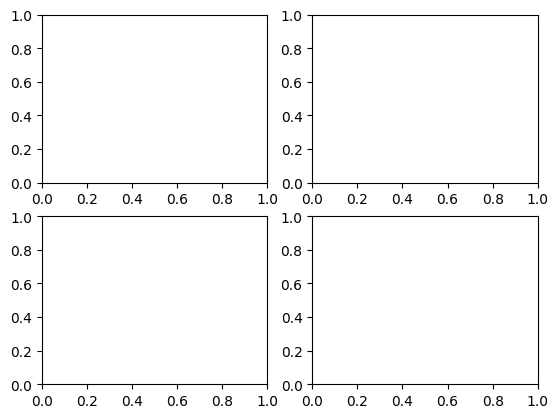

In [70]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1) 
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

In [71]:
category_names1 =da1.columns.values.tolist() 
category_names1

['Firmicutes',
 'Proteobacteria',
 'Bacteroidetes',
 'Actinobacteria',
 'Fusobacteria',
 'Tenericutes',
 'Spirochaetes',
 'Others']

In [72]:
results1= da1.T.to_dict('list') 
results1

{'HC-1-pre': [0.5247907170079591,
  0.15466243219864134,
  0.21506854356996935,
  0.05431674694770499,
  0.024601040894156333,
  0.026085286825857094,
  0.00047523255571163775,
  0.0],
 'HC-2-pre': [0.2736467629171853,
  0.2564638867592686,
  0.3097457384604892,
  0.13960442041207774,
  0.005771553655615729,
  0.0,
  0.0020837869185913833,
  0.012683850876772039],
 'HC-3-pre': [0.2638775496922802,
  0.09943847451872423,
  0.3538225304132366,
  0.26002075969001304,
  0.01983116290209865,
  0.0030095227836473143,
  0.0,
  0.0]}

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\4022215236.py:56: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\4022215236.py:72: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\4022215236.py:91: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


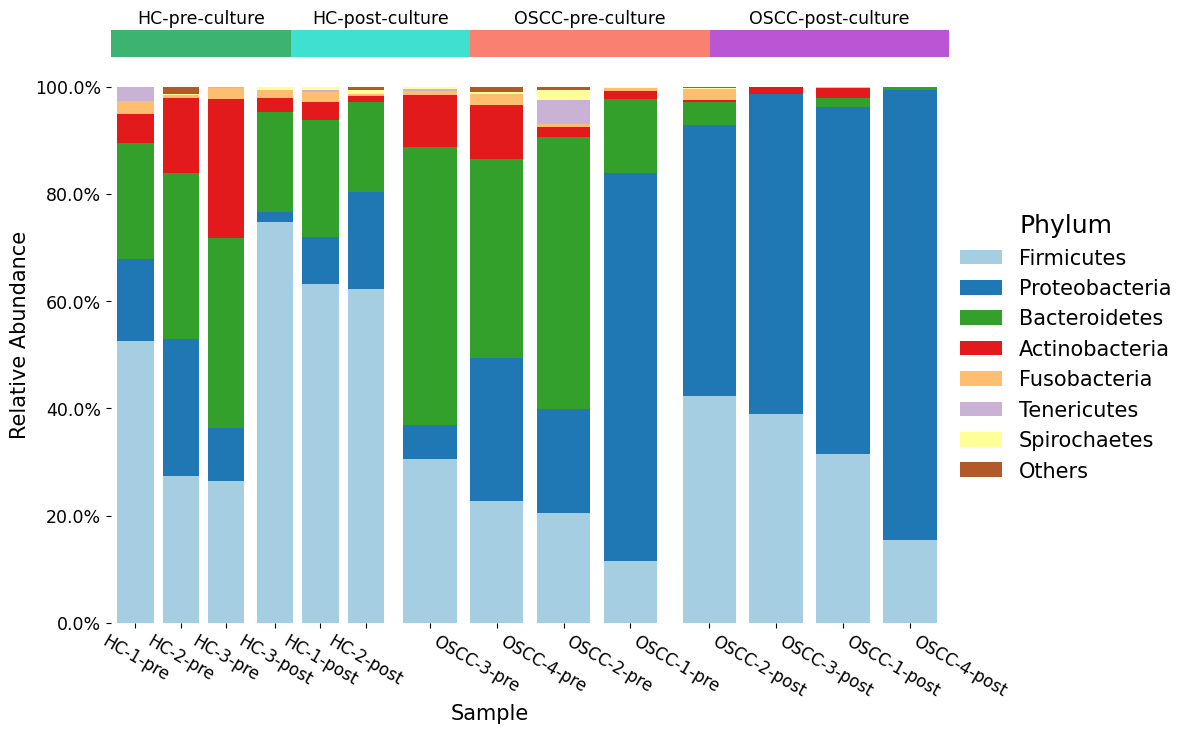

In [73]:
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
fig = plt.figure(1)
gs = GridSpec(2, 6, height_ratios=[0.05, 0.98], figure=fig)
ax0 = plt.subplot(gs[0, :])
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[1, 1])
ax3 = plt.subplot(gs[1, 2:4])
ax4 = plt.subplot(gs[1, 4:6])
# 分组标签及其颜色
groups = ['HC-pre-culture', 'HC-post-culture', 'OSCC-pre-culture', 'OSCC-post-culture']
group_colors = ['mediumseagreen',  'turquoise', 'salmon','mediumorchid']
group_sizes = [3, 3, 4, 4]  # 每个分组中的样本数

ax0.set_xlim(0, sum(group_sizes))
ax0.set_ylim(0, 1)
start = 0
for color, size in zip(group_colors, group_sizes):
    ax0.barh(0.5, size, left=start, height=1, color=color)
    start += size
ax0.axis('off')

start = 0
for group, size in zip(groups, group_sizes):
    center = start + size / 2
    ax0.text(center, 1.4, group, ha='center', va='center', fontsize=12.5)
    start += size
labels1 = list(results1.keys())
datam1 = np.array(list(results1.values()))
data_cum1 = datam1.cumsum(axis=1) 
category_colors1 = plt.get_cmap('Paired')(np.linspace(0,1, datam1.shape[1]))
for i, (colname, color) in enumerate(zip(category_names1, category_colors1)):
    heights1 = datam1[:, i]
    starts1 = (data_cum1[:, i] - heights1)
    ax1.bar(labels1, heights1, bottom=starts1, width=0.8,label=colname, color=color)
max_height1 = datam1.max()  # Get the maximum height among all bars


for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
category_names2 =da2.columns.values.tolist() 
results2= da2.T.to_dict('list') 
labels2 = list(results2.keys())
datam2 = np.array(list(results2.values()))
data_cum2 = datam2.cumsum(axis=1) 
category_colors2 = plt.get_cmap('Paired')(np.linspace(0,1, datam2.shape[1]))
for i, (colname, color) in enumerate(zip(category_names2, category_colors2)):
    heights2 = datam2[:, i]
    starts2 = (data_cum2[:, i] - heights2)
    ax2.bar(labels2, heights2, bottom=starts2, width=0.8,label=colname, color=color)
for tick in ax2.get_xticklabels():
    tick.set_fontsize(12)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names3 =da3.columns.values.tolist() 
results3= da3.T.to_dict('list') 
labels3 = list(results3.keys())
datam3 = np.array(list(results3.values()))
data_cum3 = datam3.cumsum(axis=1) 
category_colors3 = plt.get_cmap('Paired')(np.linspace(0,1, datam3.shape[1]))
for i, (colname, color) in enumerate(zip(category_names3, category_colors3)):
    heights3 = datam3[:, i]
    starts3 = (data_cum3[:, i] - heights3)
    ax3.bar(labels3, heights3, bottom=starts3, width=0.8,label=colname, color=color)
for tick in ax3.get_xticklabels():
    tick.set_fontsize(12)

ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names4 =da4.columns.values.tolist() 
results4= da4.T.to_dict('list') 
labels4 = list(results4.keys())
datam4 = np.array(list(results4.values()))
data_cum4 = datam4.cumsum(axis=1) 
category_colors4 = plt.get_cmap('Paired')(np.linspace(0,1, datam4.shape[1]))
for i, (colname, color) in enumerate(zip(category_names4, category_colors4)):
    heights4 = datam4[:, i]
    starts4 = (data_cum4[:, i] - heights4)
    ax4.bar(labels4, heights4, bottom=starts4, width=0.8,label=colname, color=color)
for tick in ax4.get_xticklabels():
    tick.set_fontsize(12)
#横坐标标题sample变大居中
fig.text(0.5, -0.05, 'Sample', ha='center', fontsize=15)
#纵坐标标题Relative Abundance变大
fig.text(0.02, 0.5, 'Relative Abundance', va='center', rotation='vertical', fontsize=15)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
lines, labels = fig.axes[-1].get_legend_handles_labels()
#y轴坐标字体变大
ax1.tick_params(axis='y', labelsize=12.5) 
#将ax3纵坐标的100.0%对齐到ax1的纵坐标的100.0%
ax1.set_ylim(ax3.get_ylim())
ax2.set_ylim(ax3.get_ylim())
ax4.set_ylim(ax3.get_ylim())
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
#去除ax2的纵坐标数值
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])

fig.legend(lines, labels, frameon=False,bbox_to_anchor=(1.2,0.7),prop = {'size':15},title='Phylum',title_fontsize='18',fontsize='12.5')


#增加每个子图的横向大小
fig.set_size_inches(10, 7)
plt.subplots_adjust(wspace =0)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-30)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-30)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=-30,ha='left')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=-30,ha='left')

for ax in [ax1, ax2, ax3, ax4]:
    for spine in ax.spines.values():
        spine.set_visible(False)
#保存为pdf格式
plt.savefig('Phylum2.pdf',dpi=300,bbox_inches='tight')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\2192346331.py:44: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\2192346331.py:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\2192346331.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15072\2192346331.py:93: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


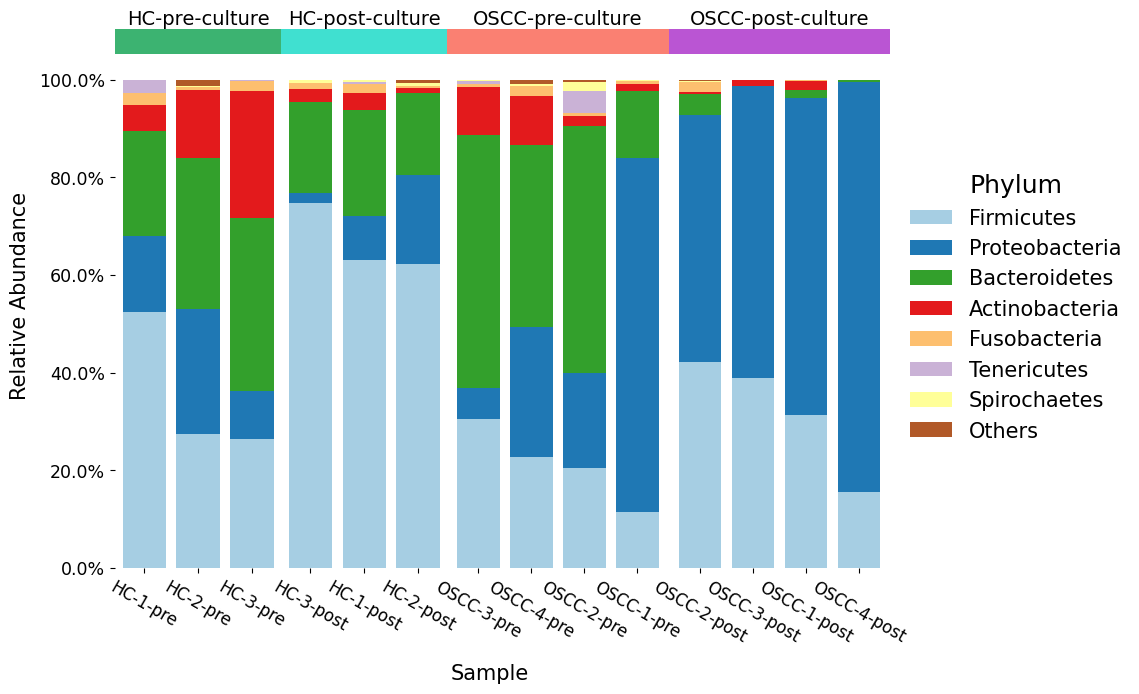

In [74]:
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
fig = plt.figure(1)
gs = GridSpec(2, 14, height_ratios=[0.05, 0.98], figure=fig)
# 创建子图  
ax0 = plt.subplot(gs[0, :])          # 第一行，占据所有14列  
ax1 = plt.subplot(gs[1, 0:3])        # 第二行，前3列  
ax2 = plt.subplot(gs[1, 3:6])        # 第二行，第4到6列  
ax3 = plt.subplot(gs[1, 6:10])       # 第二行，第7到10列  
ax4 = plt.subplot(gs[1, 10:14])      # 第二行，第11到14列  
# 分组标签及其颜色
groups = ['HC-pre-culture', 'HC-post-culture', 'OSCC-pre-culture', 'OSCC-post-culture']
group_colors = ['mediumseagreen',  'turquoise', 'salmon','mediumorchid']
group_sizes = [3, 3, 4, 4]  # 每个分组中的样本数

ax0.set_xlim(0, sum(group_sizes))
ax0.set_ylim(0, 1)
start = 0
for color, size in zip(group_colors, group_sizes):
    ax0.barh(0.5, size, left=start, height=1, color=color)
    start += size
ax0.axis('off')

start = 0
for group, size in zip(groups, group_sizes):
    center = start + size / 2
    ax0.text(center, 1.4, group, ha='center', va='center', fontsize=14)
    start += size

labels1 = list(results1.keys())
datam1 = np.array(list(results1.values()))
data_cum1 = datam1.cumsum(axis=1) 
category_colors1 = plt.get_cmap('Paired')(np.linspace(0,1, datam1.shape[1]))
for i, (colname, color) in enumerate(zip(category_names1, category_colors1)):
    heights1 = datam1[:, i]
    starts1 = (data_cum1[:, i] - heights1)
    ax1.bar(labels1, heights1, bottom=starts1, width=0.8,label=colname, color=color)
max_height1 = datam1.max()  # Get the maximum height among all bars


for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
category_names2 =da2.columns.values.tolist() 
results2= da2.T.to_dict('list') 
labels2 = list(results2.keys())
datam2 = np.array(list(results2.values()))
data_cum2 = datam2.cumsum(axis=1) 
category_colors2 = plt.get_cmap('Paired')(np.linspace(0,1, datam2.shape[1]))
for i, (colname, color) in enumerate(zip(category_names2, category_colors2)):
    heights2 = datam2[:, i]
    starts2 = (data_cum2[:, i] - heights2)
    ax2.bar(labels2, heights2, bottom=starts2, width=0.8,label=colname, color=color)
for tick in ax2.get_xticklabels():
    tick.set_fontsize(12)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names3 =da3.columns.values.tolist() 
results3= da3.T.to_dict('list') 
labels3 = list(results3.keys())
datam3 = np.array(list(results3.values()))
data_cum3 = datam3.cumsum(axis=1) 
category_colors3 = plt.get_cmap('Paired')(np.linspace(0,1, datam3.shape[1]))
for i, (colname, color) in enumerate(zip(category_names3, category_colors3)):
    heights3 = datam3[:, i]
    starts3 = (data_cum3[:, i] - heights3)
    ax3.bar(labels3, heights3, bottom=starts3, width=0.8,label=colname, color=color)
for tick in ax3.get_xticklabels():
    tick.set_fontsize(12)

ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names4 =da4.columns.values.tolist() 
results4= da4.T.to_dict('list') 
labels4 = list(results4.keys())
datam4 = np.array(list(results4.values()))
data_cum4 = datam4.cumsum(axis=1) 
category_colors4 = plt.get_cmap('Paired')(np.linspace(0,1, datam4.shape[1]))
for i, (colname, color) in enumerate(zip(category_names4, category_colors4)):
    heights4 = datam4[:, i]
    starts4 = (data_cum4[:, i] - heights4)
    ax4.bar(labels4, heights4, bottom=starts4, width=0.8,label=colname, color=color)
for tick in ax4.get_xticklabels():
    tick.set_fontsize(12)
#横坐标标题sample变大居中
fig.text(0.5, -0.05, 'Sample', ha='center', fontsize=15)
#纵坐标标题Relative Abundance变大
fig.text(0.02, 0.5, 'Relative Abundance', va='center', rotation='vertical', fontsize=15)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
lines, labels = fig.axes[-1].get_legend_handles_labels()
#y轴坐标字体变大
ax1.tick_params(axis='y', labelsize=12.5) 
#将ax3纵坐标的100.0%对齐到ax1的纵坐标的100.0%
ax1.set_ylim(ax3.get_ylim())
ax2.set_ylim(ax3.get_ylim())
ax4.set_ylim(ax3.get_ylim())
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
#去除ax2的纵坐标数值
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])

fig.legend(lines, labels, frameon=False,bbox_to_anchor=(1.15,0.7),prop = {'size':15},title='Phylum',title_fontsize='18',fontsize='12.5')


#增加每个子图的横向大小
fig.set_size_inches(10, 7)
# 调整子图之间的间距  
plt.subplots_adjust(wspace=0.0, hspace=0.1)  # hspace 设置为 0.3，根据需要调整  
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-30)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-30)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=-30)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=-30)

for ax in [ax1, ax2, ax3, ax4]:
    for spine in ax.spines.values():
        spine.set_visible(False)
#保存为pdf格式
plt.savefig('Phylum3.pdf',dpi=300,bbox_inches='tight')
plt.show()